<a href="https://colab.research.google.com/github/Lynxlazy/genomics-data-analysis/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --output-document sratoolkit.tar.gz https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/current/sratoolkit.current-ubuntu64.tar.gz
!tar -vxzf sratoolkit.tar.gz


--2023-03-04 15:57:03--  https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/current/sratoolkit.current-ubuntu64.tar.gz
Resolving ftp-trace.ncbi.nlm.nih.gov (ftp-trace.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.13, 2607:f220:41e:250::11, ...
Connecting to ftp-trace.ncbi.nlm.nih.gov (ftp-trace.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86400775 (82M) [application/x-gzip]
Saving to: ‘sratoolkit.tar.gz’

sratoolkit.tar.gz   100%[===================>]  82.40M   101MB/s    in 0.8s    

2023-03-04 15:57:04 (101 MB/s) - ‘sratoolkit.tar.gz’ saved [86400775/86400775]

sratoolkit.3.0.1-ubuntu64/
sratoolkit.3.0.1-ubuntu64/README.md
sratoolkit.3.0.1-ubuntu64/schema/
sratoolkit.3.0.1-ubuntu64/schema/insdc/
sratoolkit.3.0.1-ubuntu64/schema/insdc/sra.vschema
sratoolkit.3.0.1-ubuntu64/schema/insdc/insdc.vschema
sratoolkit.3.0.1-ubuntu64/schema/insdc/seq.vschema
sratoolkit.3.0.1-ubuntu64/schema/align/
sratoolkit.3.0.1-ubuntu64/schema/align/refse

In [2]:
!export PATH=$PATH:$PWD/sratoolkit.3.0.1-ubuntu64/bin


# 1. Exploring the dataset

In [3]:
!./sratoolkit.3.0.1-ubuntu64/bin/fasterq-dump SRR292678
!./sratoolkit.3.0.1-ubuntu64/bin/fasterq-dump SRR292862
!./sratoolkit.3.0.1-ubuntu64/bin/fasterq-dump SRR292770

spots read      : 6,111,112
reads read      : 12,222,224
reads written   : 12,222,224
spots read      : 5,102,041
reads read      : 10,204,082
reads written   : 10,204,082
spots read      : 5,102,041
reads read      : 10,204,082
reads written   : 10,204,082


# 2. K-mer profile and genome size estimation


In [4]:
!sudo apt install jellyfish

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libhts3 libjellyfish-2.0-2
The following NEW packages will be installed:
  jellyfish libhts3 libjellyfish-2.0-2
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 771 kB of archives.
After this operation, 1,727 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libhts3 amd64 1.10.2-3ubuntu0.1 [350 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libjellyfish-2.0-2 amd64 2.3.0-4build1 [60.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 jellyfish amd64 2.3.0-4build1 [361 kB]
Fetched 771 kB in 1s (1,097 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debcon

In [5]:
!jellyfish count -m 31 -s 100M -t 10 -C SRR292678_1.fastq


In [6]:
!jellyfish histo -o mer_counts.histo mer_counts.jf


In [7]:
!pip install rpy2==3.4.2
%reload_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.1/186.1 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.4.2-cp38-cp38-linux_x86_64.whl size=289753 sha256=b370216fdf2301596d30f569fb892c7f6aa4d3e25a0e81c3a6cc20e9a080c42c
  Stored in directory: /root/.cache/pip/wheels/1e/71/a3/7811e97007d6189777c751352c06f3de1a9997db9526cdabe0
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [9]:
!wc -l mer_counts.histo

911 mer_counts.histo


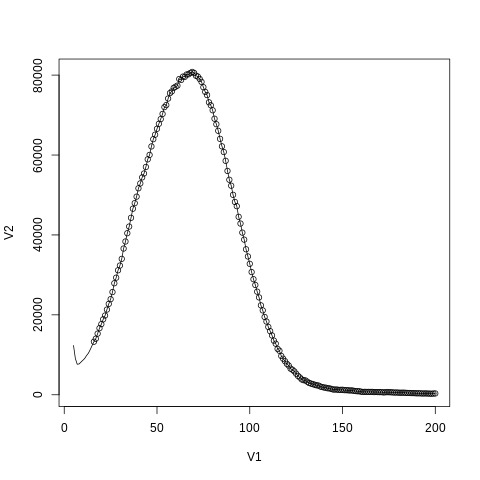

In [10]:
%%R
mer_counts <- read.table("mer_counts.histo")
plot(mer_counts[5:200,],type="l")
points(mer_counts[16:200,])

In [11]:
%%R
sum(as.numeric(mer_counts[16:911,1]*mer_counts[16:911,2]))



[1] 357259614


In [12]:
%%R
mer_counts[50:70,]

   V1    V2
50 50 66560
51 51 67808
52 52 68987
53 53 70287
54 54 71978
55 55 72496
56 56 74133
57 57 75505
58 58 75916
59 59 76811
60 60 77096
61 61 77367
62 62 79018
63 63 78781
64 64 79624
65 65 79575
66 66 80154
67 67 80196
68 68 80547
69 69 80798
70 70 80537


In [13]:
%%R
sum(as.numeric(mer_counts[16:911,1]*mer_counts[16:911,2]))/62


[1] 5762252


In [14]:
%%R
sum(as.numeric(mer_counts[10:125,1]*mer_counts[10:125,2]))/62


[1] 5404610


In [16]:
%%R
sum(as.numeric(mer_counts[10:125,1]*mer_counts[10:125,2]))/sum(as.numeric(mer_counts[16:911,1]*mer_counts[16:911,2]))

[1] 0.9379337


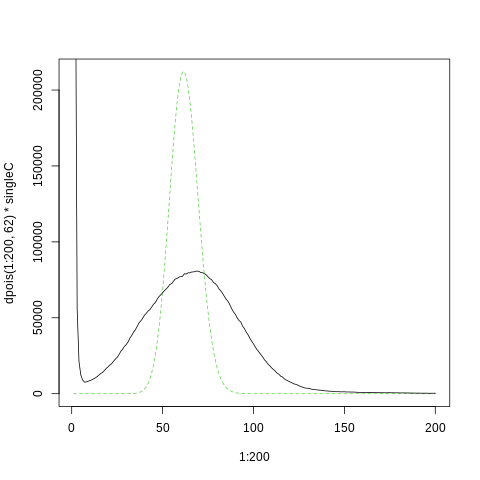

In [17]:
%%R
singleC <- sum(as.numeric(mer_counts[10:125,1]*mer_counts[10:125,2]))/80
plot(1:200,dpois(1:200, 62)*singleC, type = "l", col=3, lty=2)
lines(mer_counts[1:200,],type="l")

# 3. Assembling E. coli X genome from paired reads

In [ ]:
!apt -y install spades

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  bamtools bwa cwltool fonts-glyphicons-halflings libbamtools2.5.1 libc-ares2
  libhat-trie0 libjs-bootstrap libnlopt0 libnode64 libssw0 nodejs nodejs-doc
  python3-atomicwrites python3-attr python3-bs4 python3-cachecontrol
  python3-coloredlogs python3-dateutil python3-decorator python3-html5lib
  python3-humanfriendly python3-importlib-metadata python3-isodate
  python3-joblib python3-lockfile python3-lxml python3-mistune
  python3-more-itertools python3-msgpack python3-mypy-extensions
  python3-networkx python3-packaging python3-pluggy python3-prov
  python3-psutil python3-py python3-pyparsing python3-pytest python3-rdflib
  python3-rdflib-jsonld python3-ruamel.yaml python3-schema-salad
  python3-shellescape python3-simplejson python3-soupsieve
  python3-sparqlwrapper python3-typing-extensions python3-wcwidth
  python3-webencodings pyth

In [ ]:
!spades -1 SRR292678_1.fastq -2 SRR292678_2.fastq -o output

/bin/bash: spades: command not found


In [ ]:
!pip install quast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 14.2 MB/s eta 0:00:00
  Created wheel for quast: filename=quast-5.2.0-py3-none-any.whl size=31206447 sha256=281f73ed867a5bfd27bbaa73b629be2644c3b00567c0bd0ef551a5930cb65a97
  Stored in directory: /root/.cache/pip/wheels/79/fe/84/429b22fc6184f0807dfdcb67bdf0d95441b3415bce83219ad2
Successfully built quast


In [ ]:
!quast.py output/contigs.fasta

/usr/local/bin/quast.py output/contigs.fasta

Version: 5.2.0

System information:
  OS: Linux-5.10.147+-x86_64-with-glibc2.29 (linux_64)
  Python version: 3.8.10
  CPUs number: 2

Started: 2023-03-03 11:27:07

Logging to /content/quast_results/results_2023_03_03_11_27_07/quast.log
NOTICE: Maximum number of threads is set to 1 (use --threads option to set it manually)

CWD: /content
Main parameters: 
  MODE: default, threads: 1, min contig length: 500, min alignment length: 65, min alignment IDY: 95.0, \
  ambiguity: one, min local misassembly length: 200, min extensive misassembly length: 1000

Contigs:
  Pre-processing...
  output/contigs.fasta ==> contigs

2023-03-03 11:27:08
Running Basic statistics processor...
  Contig files: 
    contigs
  Calculating N50 and L50...
    contigs, N50 = 105346, L50 = 15, auN = 127832.1, Total length = 5245723, GC % = 50.53, # N's per 100 kbp =  0.00
  Drawing Nx plot...
    saved to /content/quast_results/results_2023_03_03_11_27_07/basic_stats/Nx_

In [ ]:
!cat quast_results/latest/report.txt

All statistics are based on contigs of size >= 500 bp, unless otherwise noted (e.g., "# contigs (>= 0 bp)" and "Total length (>= 0 bp)" include all contigs).

Assembly                    contigs 
# contigs (>= 0 bp)         510     
# contigs (>= 1000 bp)      147     
# contigs (>= 5000 bp)      82      
# contigs (>= 10000 bp)     69      
# contigs (>= 25000 bp)     51      
# contigs (>= 50000 bp)     33      
Total length (>= 0 bp)      5316686 
Total length (>= 1000 bp)   5206945 
Total length (>= 5000 bp)   5043449 
Total length (>= 10000 bp)  4953165 
Total length (>= 25000 bp)  4664641 
Total length (>= 50000 bp)  4002075 
# contigs                   201     
Largest contig              300784  
Total length                5245723 
GC (%)                      50.53   
N50                         105346  
N90                         21421   
auN                         127832.1
L50                         15      
L90                         54      
# N's per 100 kbp          

# 3a. Effect of read correction.

In [18]:
!unzip spades_output.zip

unzip:  cannot find or open spades_output.zip, spades_output.zip.zip or spades_output.zip.ZIP.


# 4. Impact of reads with large insert size

In [ ]:
!spades.py --pe1-1 SRR292678_1.fastq --pe1-2 SRR292678_2.fastq \
    --mp1-1 SRR292770_1.fastq --mp1-2 SRR292770_2.fastq \
    --mp2-1 SRR292862_1.fastq --mp2-2 SRR292862_2.fastq \
    -o spades_output

Command line: /usr/lib/spades/bin/spades.py	--pe1-1	/content/SRR292678_1.fastq	--pe1-2	/content/SRR292678_2.fastq	--mp1-1	/content/SRR292770_1.fastq	--mp1-2	/content/SRR292770_2.fastq	--mp2-1	/content/SRR292862_1.fastq	--mp2-2	/content/SRR292862_2.fastq	-o	/content/spades_output	

System information:
  SPAdes version: 3.13.1
  Python version: 3.8.10
  OS: Linux-5.10.147+-x86_64-with-glibc2.29

Output dir: /content/spades_output
Mode: read error correction and assembling
Debug mode is turned OFF

Dataset parameters:
  Multi-cell mode (you should set '--sc' flag if input data was obtained with MDA (single-cell) technology or --meta flag if processing metagenomic dataset)
  Reads:
    Library number: 1, library type: mate-pairs
      orientation: rf
      left reads: ['/content/SRR292770_1.fastq']
      right reads: ['/content/SRR292770_2.fastq']
      interlaced reads: not specified
      single reads: not specified
      merged reads: not specified
    Library number: 2, library type: m

In [ ]:
!unzip three_libs_spades_out.zip

Archive:  three_libs_spades_out.zip
   creating: three_libs_spades_out/
  inflating: three_libs_spades_out/PROKKA_03032023.zip  
  inflating: three_libs_spades_out/contigs.fasta.fai  
  inflating: three_libs_spades_out/contigs.fasta  
  inflating: three_libs_spades_out/scaffolds.fasta  
  inflating: three_libs_spades_out/spades.log  
   creating: three_libs_spades_out/PROKKA_03032023/
  inflating: three_libs_spades_out/PROKKA_03032023/PROKKA_03032023.fna.fai  
  inflating: three_libs_spades_out/PROKKA_03032023/PROKKA_03032023.log  
  inflating: three_libs_spades_out/PROKKA_03032023/PROKKA_03032023.fna  
  inflating: three_libs_spades_out/PROKKA_03032023/PROKKA_03032023.gff  
  inflating: three_libs_spades_out/PROKKA_03032023/PROKKA_03032023.faa  
  inflating: three_libs_spades_out/PROKKA_03032023/PROKKA_03032023.ffn  
  inflating: three_libs_spades_out/PROKKA_03032023/PROKKA_03032023.tbl  
  inflating: three_libs_spades_out/PROKKA_03032023/PROKKA_03032023.fsa  
  inflating: three_libs_

In [ ]:
!quast.py three_libs_spades_out/contigs.fasta

/usr/local/bin/quast.py three_libs_spades_out/contigs.fasta

Version: 5.2.0

System information:
  OS: Linux-5.10.147+-x86_64-with-glibc2.29 (linux_64)
  Python version: 3.8.10
  CPUs number: 2

Started: 2023-03-04 06:54:21

Logging to /content/quast_results/results_2023_03_04_06_54_21/quast.log
NOTICE: Maximum number of threads is set to 1 (use --threads option to set it manually)

CWD: /content
Main parameters: 
  MODE: default, threads: 1, min contig length: 500, min alignment length: 65, min alignment IDY: 95.0, \
  ambiguity: one, min local misassembly length: 200, min extensive misassembly length: 1000

Contigs:
  Pre-processing...
  three_libs_spades_out/contigs.fasta ==> contigs

2023-03-04 06:54:22
Running Basic statistics processor...
  Contig files: 
    contigs
  Calculating N50 and L50...
    contigs, N50 = 335515, L50 = 6, auN = 319603.4, Total length = 5350156, GC % = 50.59, # N's per 100 kbp =  0.00
  Drawing Nx plot...
    saved to /content/quast_results/results_2023_0

In [ ]:
!cat quast_results/latest/report.txt

All statistics are based on contigs of size >= 500 bp, unless otherwise noted (e.g., "# contigs (>= 0 bp)" and "Total length (>= 0 bp)" include all contigs).

Assembly                    contigs 
# contigs (>= 0 bp)         369     
# contigs (>= 1000 bp)      79      
# contigs (>= 5000 bp)      33      
# contigs (>= 10000 bp)     30      
# contigs (>= 25000 bp)     26      
# contigs (>= 50000 bp)     22      
Total length (>= 0 bp)      5403327 
Total length (>= 1000 bp)   5331230 
Total length (>= 5000 bp)   5202939 
Total length (>= 10000 bp)  5183802 
Total length (>= 25000 bp)  5133691 
Total length (>= 50000 bp)  4975501 
# contigs                   105     
Largest contig              698474  
Total length                5350156 
GC (%)                      50.59   
N50                         335515  
N90                         79998   
auN                         319603.4
L50                         6       
L90                         20      
# N's per 100 kbp          

# 5. Genome Annotation

In [ ]:
!sudo apt-get install libdatetime-perl libxml-simple-perl libdigest-md5-perl git default-jre bioperl
!sudo cpan Bio::Perl
!git clone https://github.com/tseemann/prokka.git $HOME/prokka
!$HOME/prokka/bin/prokka --setupdb

Выходные данные были обрезаны до нескольких последних строк (5000).
t/00_diag.t ............................. ok
t/alien_build_plugin_download_gitlab.t .. ok
All tests successful.
Files=2, Tests=2,  0 wallclock secs ( 0.03 usr  0.01 sys +  0.37 cusr  0.04 csys =  0.45 CPU)
Result: PASS
  PLICEASE/Alien-Build-Plugin-Download-GitLab-0.01.tar.gz
  /usr/bin/make test -- OK
Running make install for PLICEASE/Alien-Build-Plugin-Download-GitLab-0.01.tar.gz
Manifying 1 pod document
Installing /usr/local/share/perl/5.30.0/Alien/Build/Plugin/Download/GitLab.pm
Installing /usr/local/man/man3/Alien::Build::Plugin::Download::GitLab.3pm
Appending installation info to /usr/local/lib/x86_64-linux-gnu/perl/5.30.0/perllocal.pod
  PLICEASE/Alien-Build-Plugin-Download-GitLab-0.01.tar.gz
  /usr/bin/make install  -- OK
  PLICEASE/Alien-Libxml2-0.19.tar.gz
  Has already been unwrapped into directory /root/.cpan/build/Alien-Libxml2-0.19-0
Configuring P/PL/PLICEASE/Alien-Libxml2-0.19.tar.gz with Makefile.PL
Ali

In [ ]:
!apt install libxml-simple-perl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libauthen-sasl-perl libdata-dump-perl libencode-locale-perl
  libfile-listing-perl libfont-afm-perl libhtml-form-perl libhtml-format-perl
  libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-perl libio-html-perl
  libio-socket-ssl-perl liblwp-mediatypes-perl liblwp-protocol-https-perl
  libmailtools-perl libnet-http-perl libnet-smtp-ssl-perl libnet-ssleay-perl
  libtry-tiny-perl liburi-perl libwww-perl libwww-robotrules-perl
  libxml-libxml-perl libxml-namespacesupport-perl libxml-parser-perl
  libxml-sax-base-perl libxml-sax-expat-perl libxml-sax-perl netbase
  perl-openssl-defaults
Suggested packages:
  libdigest-hmac-perl libgssapi-perl libcrypt-ssleay-perl libauthen-ntlm-perl
  libxml-sax-expatxs-perl
The following NEW package

In [ ]:
#!wget -N ftp://ftp.ncbi.nih.gov/toolbox/ncbi_tools/converters/by_program/tbl2asn/linux64.tbl2asn.gz
#!gunzip linux64.tbl2asn.gz
#!chmod +x linux64.tbl2asn
#!mv  linux64.tbl2asn /usr/local/bin/tbl2asn
!tbl2asn --help



tbl2asn: error while loading shared libraries: libidn.so.11: cannot open shared object file: No such file or directory


In [ ]:
!sudo apt-get install parallel
!sudo apt install libc6
!sudo apt install libidn11




Reading package lists... Done
Building dependency tree       
Reading state information... Done
parallel is already the newest version (20161222-1.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libc6 is already the newest version (2.31-0ubuntu9.9).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libidn11
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 46.2 kB of archives.
After this operation, 250 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libidn11 amd64 1.33-2.2ubuntu2 [46.2 kB]
Fetched 46.2 kB in 0s (171 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based f

In [ ]:
!$HOME/prokka/bin/prokka --setupdb
!$HOME/prokka/bin/prokka --force --compliant three_libs_spades_out/scaffolds.fasta 

[10:50:59] Appending to PATH: /root/prokka/bin/../binaries/linux
[10:50:59] Appending to PATH: /root/prokka/bin/../binaries/linux/../common
[10:50:59] Appending to PATH: /root/prokka/bin
[10:50:59] Cleaning databases in /root/prokka/db
[10:50:59] Deleting unwanted file: /root/prokka/db/kingdom/Archaea/sprot.phd
[10:50:59] Deleting unwanted file: /root/prokka/db/kingdom/Archaea/sprot.phi
[10:50:59] Deleting unwanted file: /root/prokka/db/kingdom/Archaea/sprot.phr
[10:50:59] Deleting unwanted file: /root/prokka/db/kingdom/Archaea/sprot.pin
[10:50:59] Deleting unwanted file: /root/prokka/db/kingdom/Archaea/sprot.pog
[10:50:59] Deleting unwanted file: /root/prokka/db/kingdom/Archaea/sprot.psd
[10:50:59] Deleting unwanted file: /root/prokka/db/kingdom/Archaea/sprot.psi
[10:50:59] Deleting unwanted file: /root/prokka/db/kingdom/Archaea/sprot.psq
[10:50:59] Deleting unwanted file: /root/prokka/db/kingdom/Bacteria/AMR.phd
[10:50:59] Deleting unwanted file: /root/prokka/db/kingdom/Bacteria/AMR.

# 6. Finding the closest relative of E. coli X

In [ ]:
!git clone https://github.com/tseemann/barrnap.git $HOME/barrnap


Cloning into '/root/barrnap'...
remote: Enumerating objects: 298, done.
remote: Total 298 (delta 0), reused 0 (delta 0), pack-reused 298
Receiving objects: 100% (298/298), 13.58 MiB | 15.19 MiB/s, done.
Resolving deltas: 100% (142/142), done.
Synopsis:
  barrnap 0.9 - rapid ribosomal RNA prediction
Author:
  Torsten Seemann
Usage:
  barrnap [options] chr.fa
  barrnap [options] < chr.fa
  barrnap [options] - < chr.fa
Options:
  --help            This help
  --version         Print version and exit
  --citation        Print citation for referencing barrnap
  --kingdom [X]     Kingdom: arc euk mito bac (default 'bac')
  --quiet           No screen output (default OFF)
  --threads [N]     Number of threads/cores/CPUs to use (default '1')
  --lencutoff [n.n] Proportional length threshold to label as partial (default '0.8')
  --reject [n.n]    Proportional length threshold to reject prediction (default '0.25')
  --evalue [n.n]    Similarity e-value cut-off (default '1e-06')
  --incseq       

In [ ]:
!apt install bedtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 580 kB of archives.
After this operation, 2,055 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 bedtools amd64 2.27.1+dfsg-4ubuntu1 [580 kB]
Fetched 580 kB in 0s (1,607 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 129215 files and directories currently installed.)
Preparing to unpack .../bedtools_2.27.1+dfsg-4ubuntu1_amd64.deb ...
Unpacking bedtools (2.27.1+dfsg-4ubuntu1) ...
Setting up bedtools (2.27.1+dfsg-4ubuntu1) ...


In [ ]:
!$HOME/barrnap/bin/barrnap -q --outseq barnap_result three_libs_spades_out/contigs.fasta

##gff-version 3
NODE_10_length_200190_cov_71.1956_ID_565843	barrnap:0.9	rRNA	196810	196920	2.2e-11	-	.	Name=5S_rRNA;product=5S ribosomal RNA
NODE_10_length_200190_cov_71.1956_ID_565843	barrnap:0.9	rRNA	197019	199919	0	-	.	Name=23S_rRNA;product=23S ribosomal RNA
NODE_110_length_440_cov_1.36364_ID_566047	barrnap:0.9	rRNA	34	439	9.8e-23	+	.	Name=16S_rRNA;product=16S ribosomal RNA (partial);note=aligned only 25 percent of the 16S ribosomal RNA
NODE_12_length_148545_cov_76.5282_ID_565905	barrnap:0.9	rRNA	6	2761	0	+	.	Name=23S_rRNA;product=23S ribosomal RNA
NODE_12_length_148545_cov_76.5282_ID_565905	barrnap:0.9	rRNA	2860	2970	2.2e-11	+	.	Name=5S_rRNA;product=5S ribosomal RNA
NODE_16_length_113537_cov_78.5276_ID_565907	barrnap:0.9	rRNA	111955	113492	0	+	.	Name=16S_rRNA;product=16S ribosomal RNA
NODE_18_length_95616_cov_83.274_ID_565909	barrnap:0.9	rRNA	272	3172	0	+	.	Name=23S_rRNA;product=23S ribosomal RNA
NODE_18_length_95616_cov_83.274_ID_565909	barrnap:0.9	rRNA	3271	3381	2.2e-11	+	.	Name=

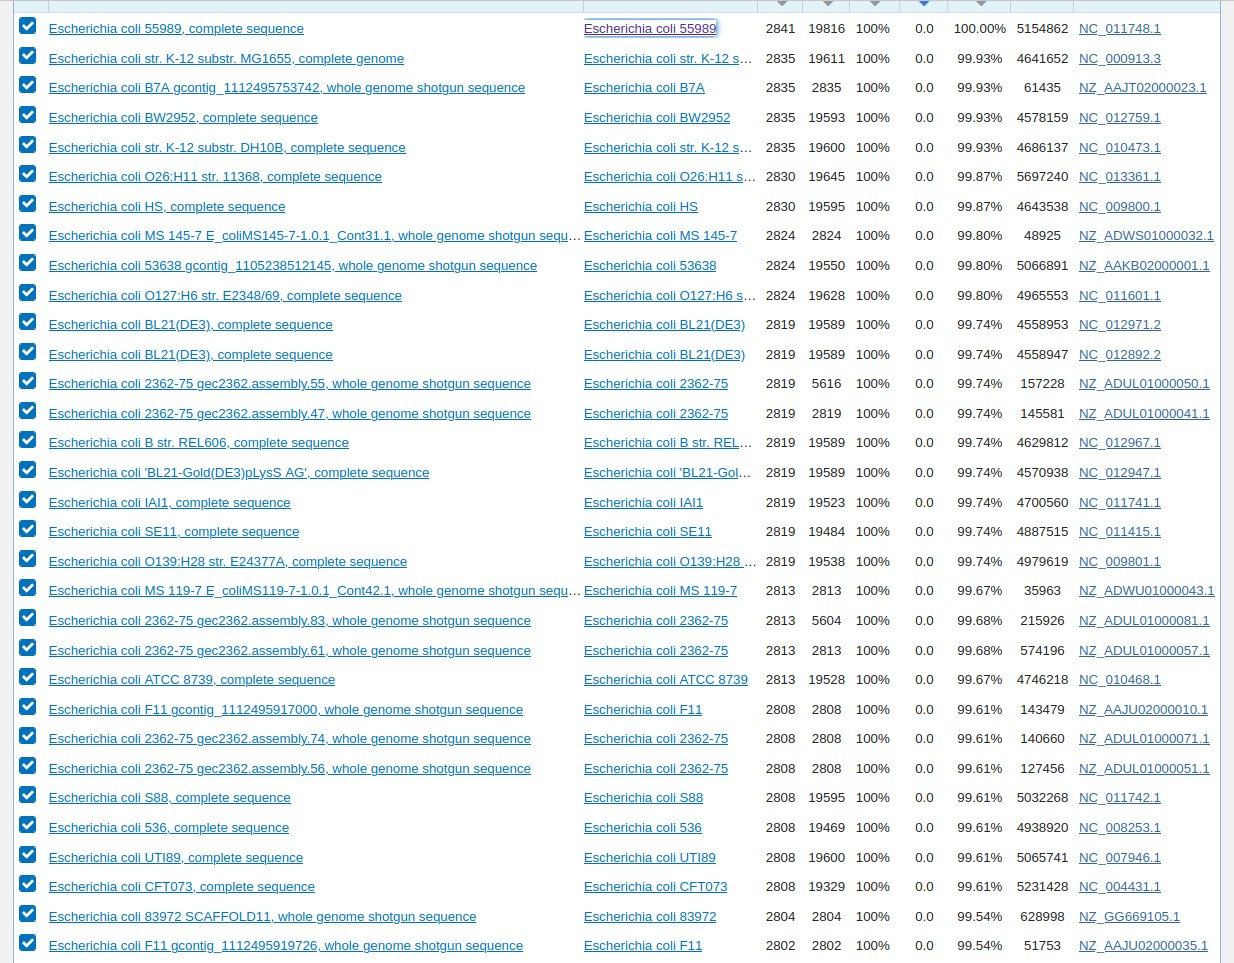

# 7. What is the genetic cause of HUS?

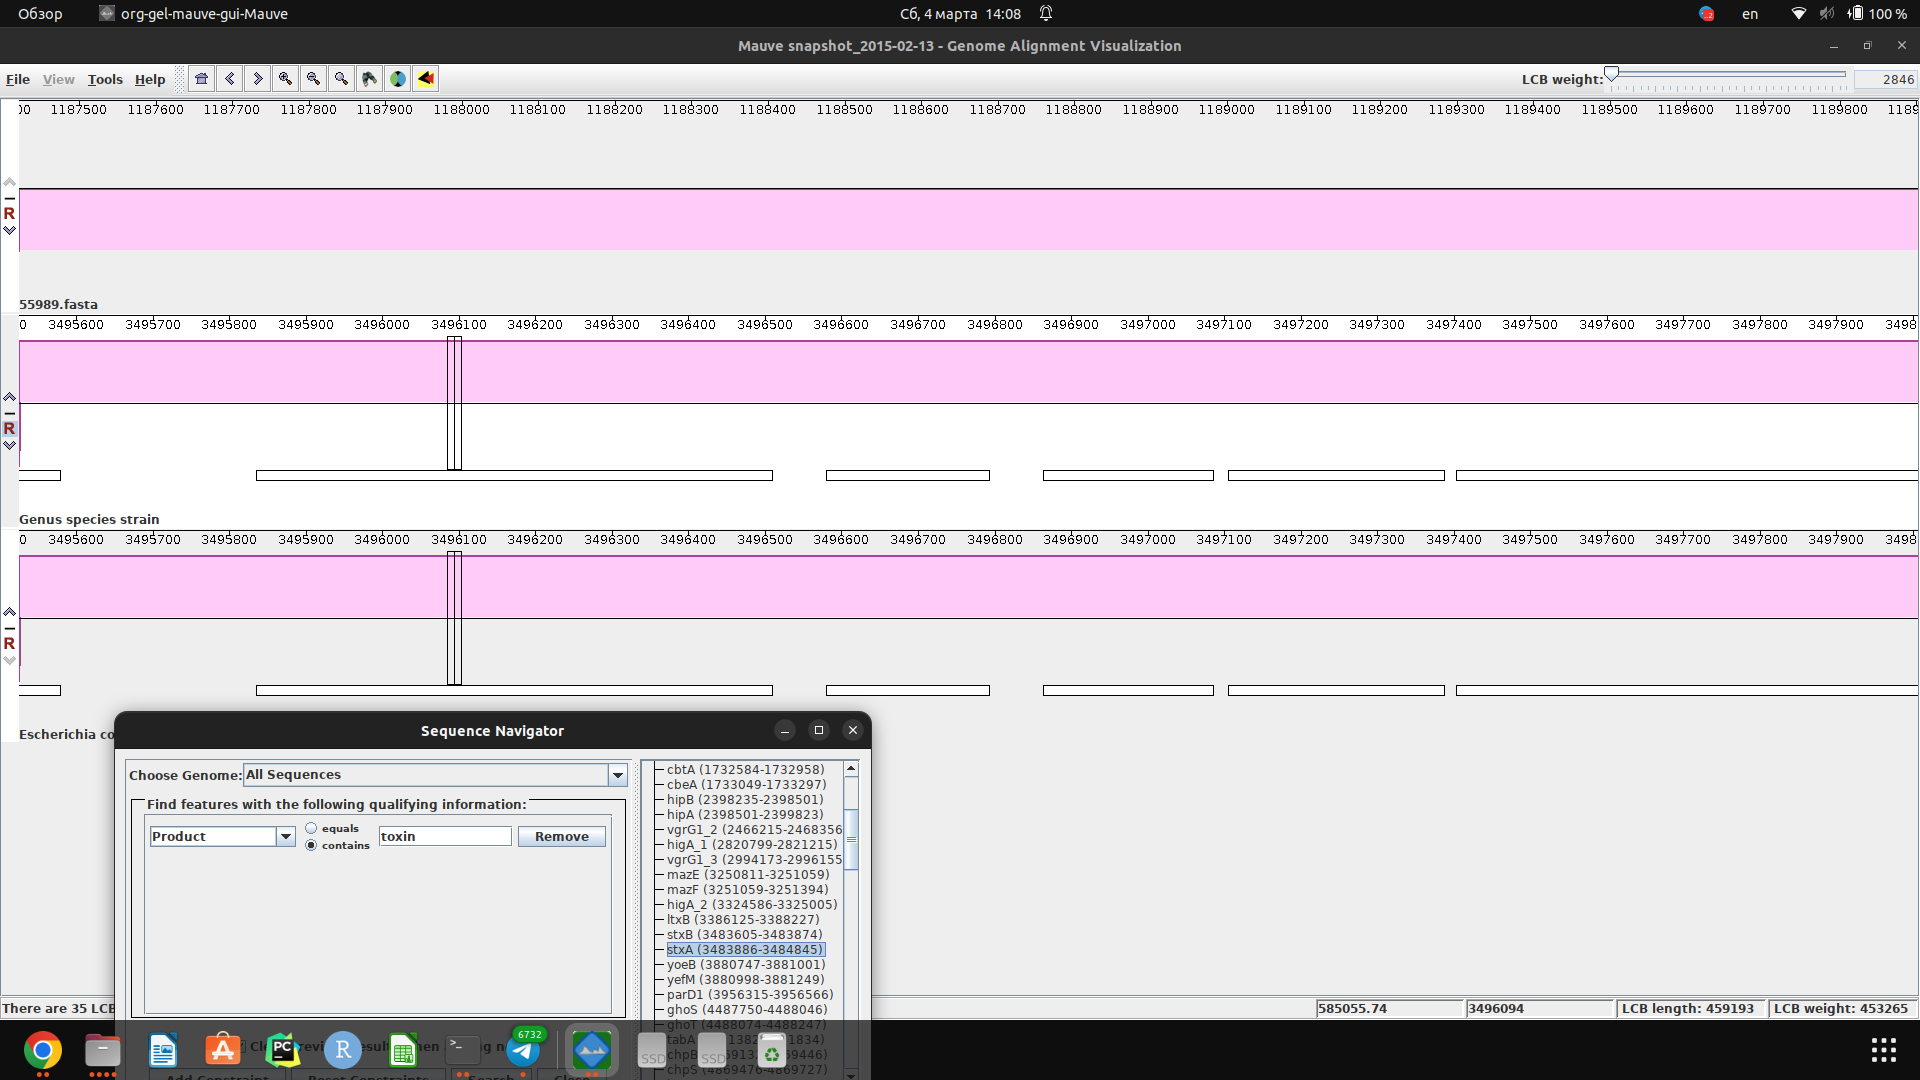